# Color Threshold, Green Screen

### Import resources

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

In [2]:
# Read in the image
image = mpimg.imread('images/car_green_screen.jpg')

# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', image.shape)


Image dimensions: (450, 660, 3)


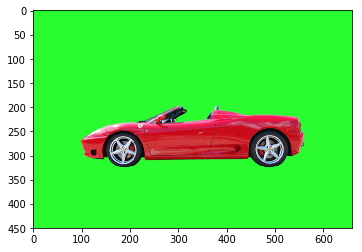

In [3]:
# Display the image
plt.imshow(image)

### Define the color threshold

In [8]:
## Define our color selection boundaries in RGB values
lower_green = np.array([0,200,0]) 
upper_green = np.array([250,255,250])


### Create a mask

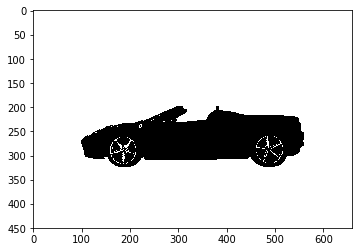

In [9]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

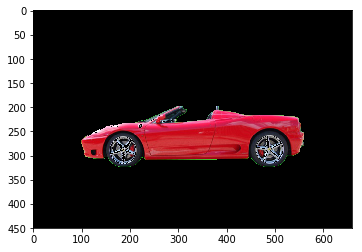

In [10]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)


### Mask and add a background image

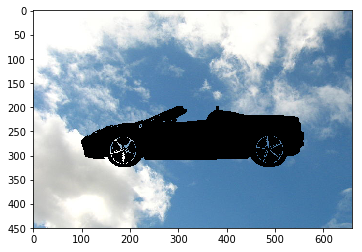

In [20]:
# Load in a background image, and convert it to RGB 
background_image = mpimg.imread('images/sky.jpg')

# Crop it or resize the background to be the right size (450x660)
croped_background = np.copy(background_image[0:450, 0:660])

# mask the opposite area of the previous image
croped_background[mask == 0] = [0, 0, 0]

# Display the background and make sure 
plt.imshow(croped_background)


### Create a complete image

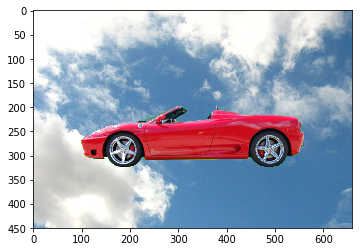

In [21]:
#Add the two images together to create a complete image!
complete_image = croped_background + masked_image

#Display the result
plt.imshow(complete_image)



## Solutions for TODOs

#### Define our color selection boundaries in RGB values
lower_green = np.array([0,240,0]) 

#### Load in a background image, and convert it to RGB 
background_image = mpimg.imread('<file_name>')
background_image = mpimg.cvtColor(background_image, cv2.COLOR_BGR2RGB)

#### Crop it to the right size (450x660)
crop_background = background_image[0:450, 0:660]

#### Create a writable copy of the cropped background
crop_background = crop_background.copy()


#### Mask the cropped background so that the image area is blocked
crop_background[mask == 0] = [0, 0, 0]

#### Display the background
plt.imshow(crop_background)

#### Add the two images together to create a complete image!
complete_image = masked_image + crop_background

#### Display the result
plt.imshow(complete_image)